<a href="https://colab.research.google.com/github/AngleKit/HomeworkPython/blob/main/ClassNotebooks/KWWexperimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
! git clone https://github.com/cbishop4/MSE7530

Cloning into 'MSE7530'...
remote: Enumerating objects: 515, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 515 (delta 19), reused 5 (delta 5), pack-reused 494 (from 2)
Receiving objects: 100% (515/515), 75.65 MiB | 38.38 MiB/s, done.
Resolving deltas: 100% (181/181), done.


Coding up the KWW Equation

In [4]:
def KWW(time, r_0, tau,beta,C): # user defined function; frist argument should be x-azis
  return r_0 * np.exp(-(time/tau)**beta) + C

### Task 1 : What is the effect of $\beta$ on the shape of a KWW curve?

Text(0, 0.5, 'Y-value')

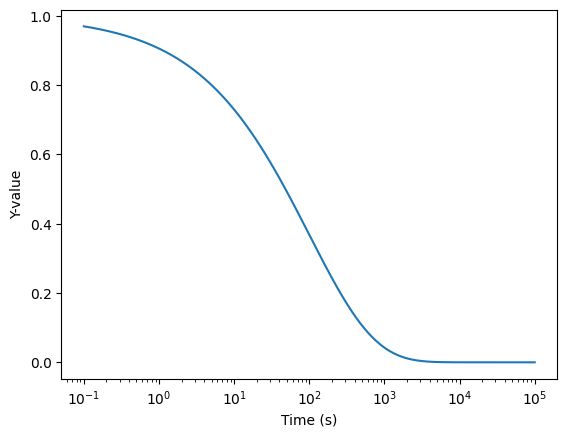

In [5]:
times = np.logspace(-1,5,1000) # set up some times on the x-axis
KWW1 = KWW(times, r_0 = 1., tau = 100., beta=0.5, C = 0)
fig, ax = plt.subplots()
ax.plot(times,KWW1)
ax.semilogx()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Y-value')

[]

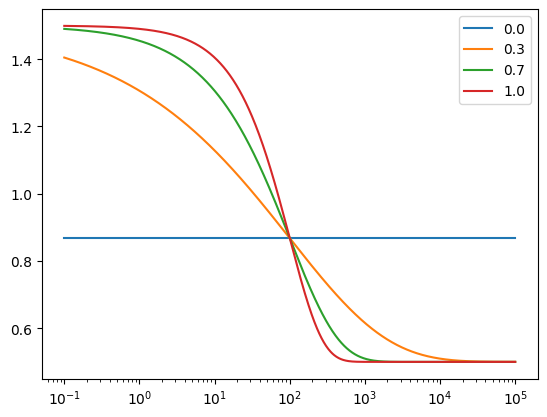

In [10]:
betas = np.linspace(0.0,1.0, 4) # choose your values of beta
for b in betas:
  KWW1 = KWW(times, r_0 = 1., tau = 100., beta=b, C = 0.5)
  plt.plot(times,KWW1,label=f'{np.round(b,1)}')
plt.legend()
plt.semilogx()
# As the beta increase there is a smaller width at which it decays. The lower values are des there is more time before the

[]

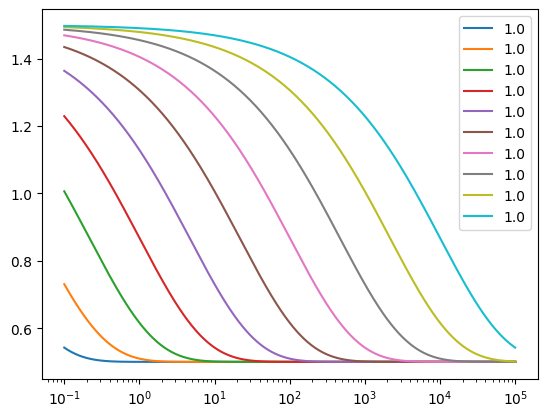

In [12]:
taus = np.logspace(-2, 4,10) # choose your values of beta
for  t in taus:
  KWW1 = KWW(times, r_0 = 1., tau = t, beta=0.5, C = 0.5)
  plt.plot(times,KWW1,label=f'{np.round(b,1)}')
plt.legend()
plt.semilogx()
# As the beta increase there is a smaller width at which it decays. The lower values are des there is more time before the

## Fitting functions to data

Here, we will fit a *user-defined function* to data

In [13]:
K315 = pd.read_csv('/content/MSE7530/sampledata/315K.csv',header=None)
K317 = pd.read_csv('/content/MSE7530/sampledata/317K.csv',header=None)
K320 = pd.read_csv('/content/MSE7530/sampledata/320K.csv',header=None)
K323 = pd.read_csv('/content/MSE7530/sampledata/323K.csv',header=None)

Text(0, 0.5, 'r(t)')

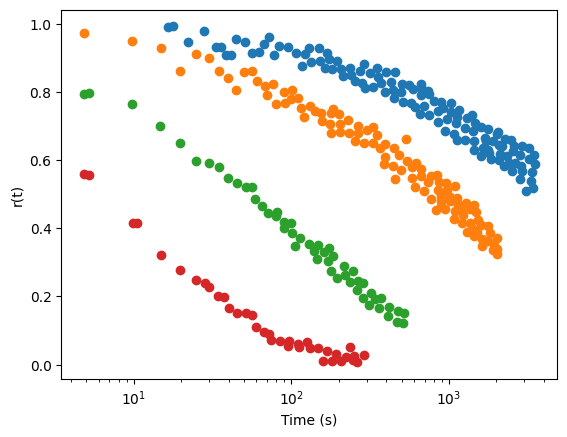

In [15]:
for k in [K315, K317, K320, K323]:
  plt.plot(k[0],k[1],'o')
plt.semilogx()
plt.xlabel('Time (s)')
plt.ylabel('r(t)')
# note, the cut off and not reach full decay because at a final point they will cut off

In [16]:
from scipy.optimize import curve_fit

In [18]:
def KWW(time, r_0, tau,beta,C): # user defined function; frist argument should be x-azis
  return r_0 * np.exp(-(time/tau)**beta) + C

In [19]:
# curve_fit  is the scipy function
# curve_fit (user-defind function, xdata, ydata)
popt, pcov = curve_fit(KWW, K320[0], K320[1])

In [20]:
popt # optimum parameter from fit

array([ 1.03481048e+00,  1.23565981e+02,  4.57937487e-01, -1.92840789e-02])

[]

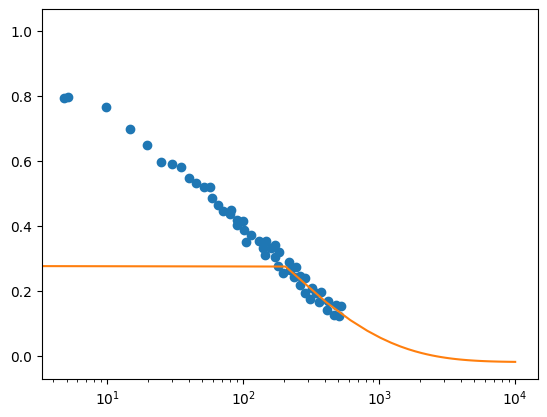

In [22]:
hypothetical_times = np.linspace(0,10**4)
plt.plot(K320[0],K320[1],'o')
plt.plot(hypothetical_times, KWW(hypothetical_times, *popt))
plt.semilogx()

In [21]:
pcov

array([[ 2.06099186e-02,  2.20686255e+00, -1.05755932e-02,
        -1.05175831e-02],
       [ 2.20686255e+00,  4.97083441e+02, -1.08499443e+00,
        -1.45676930e+00],
       [-1.05755932e-02, -1.08499443e+00,  5.49898764e-03,
         5.33674811e-03],
       [-1.05175831e-02, -1.45676930e+00,  5.33674811e-03,
         5.79273397e-03]])

In [23]:
# def KWW(time, r_0, tau,beta,C):
#   return r_0 * np.exp(-(time/tau)**beta) + C
bounds = ([0.8, 1.0, 0.4, 0.], [1.001, 500., 0.6, 0.0001])
popt, pcov = curve_fit(KWW, K320[0], K320[1],bounds = bounds)

In [ ]:
hypothetical_times = np.linspace(0,10**4,10000)
plt.plot(K320[0],K320[1],'o')
plt.plot(hypothetical_times, KWW(hypothetical_times, *popt))
plt.semilogx()

## What are the $\beta$ and $\tau$ values for the four above curves?